In [ ]:
#Self-Learning Tutorial - Sean Davis 2024

In [392]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [394]:
#Read and show dataset
df = pd.read_csv ('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [388]:
#Display number of patients who have and haven't had a stroke 
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

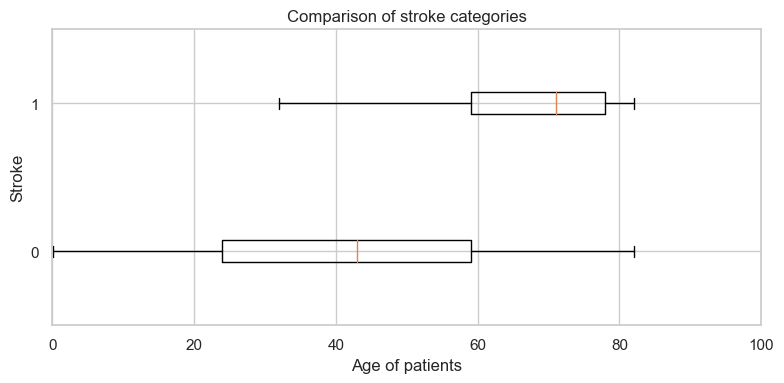

In [395]:
# Create boxplot funxtion
def boxplot_los_groupby(variable, age_range=(0,100), size=(8,4)):

    results = df[[variable, 'age']].groupby(variable).median().reset_index()

    categories = results[variable].values.tolist()

    hist_data = []
    for cat in categories:
        hist_data.append(df['age'].loc[df[variable]==cat].values)

    fig, ax = plt.subplots(figsize=size)
    ax.boxplot(hist_data, 0, '', vert=False)
    ax.set_xlim(age_range)
    ax.set_yticklabels(categories)
    ax.set_xlabel('Age of patients')
    ax.set_ylabel('Stroke')
    ax.tick_params(left=False, right=False)
    ax.set_title('Comparison of {} categories'.format(variable))
    plt.tight_layout()
    plt.show();

#Show boxplot
boxplot_los_groupby('stroke', age_range=(0,100))

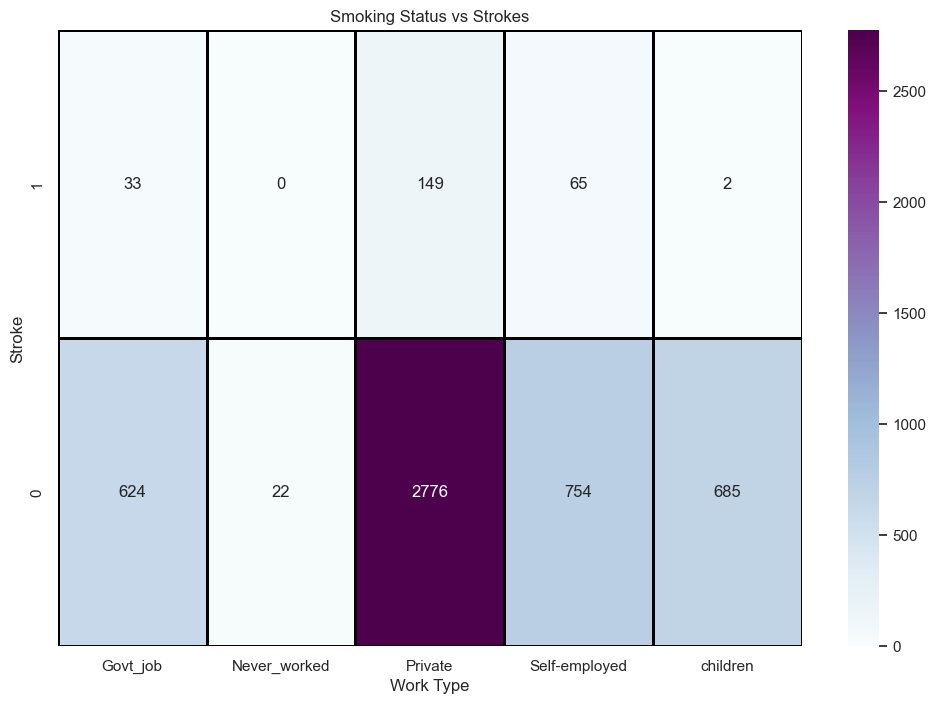

In [399]:
# Create a pivot table to prepare data for the heatmap
pivot_table = df.groupby(['stroke', 'work_type']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
ax=sns.heatmap(pivot_table, annot=True, fmt='g',cmap='BuPu',linewidths = 2, linecolor='Black')
plt.title("Smoking Status vs Strokes")
plt.xlabel("Work Type")
plt.ylabel("Stroke")
ax.invert_yaxis()

# Show the heatmap
plt.show()

<Axes: xlabel='work_type', ylabel='Proportion'>

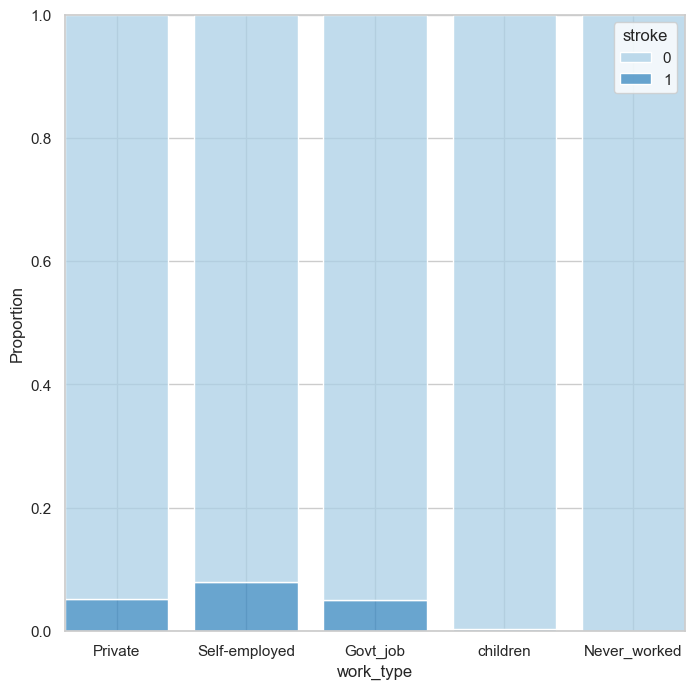

In [398]:
#Create histogram showing proportions of patients who have had a stroke by work type
plt.figure(figsize=(8, 8))
hist=sns.histplot(
    data=df,
    x="work_type", hue="stroke",
    multiple="fill", stat="proportion", palette="Blues",
    discrete=True, shrink=.8
)
hist

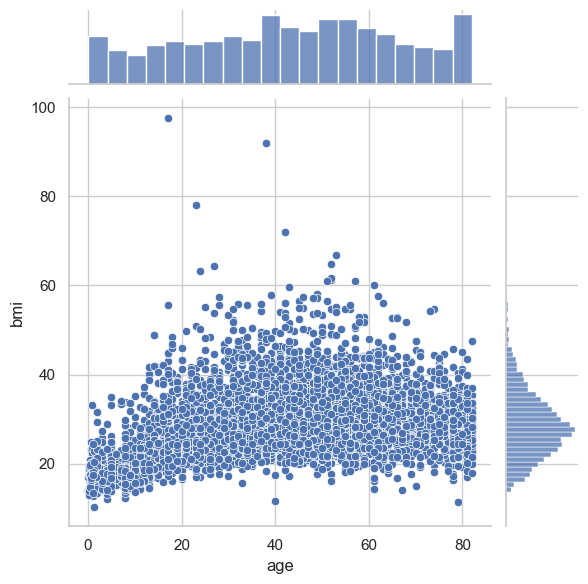

In [406]:
# Create scatterplot showing age and bmi
sns.set(style="whitegrid")
sns.jointplot(data=df, x='age', y='bmi', kind='scatter')
plt.show()

In [407]:
#Remove unrealistic outliers and null values for bmi column 
dffilter=dffilter[dffilter['bmi']<=70]
dffilter=dffilter[dffilter['bmi']>0]

In [411]:
# Create dummy columns for categorical variables
prefix_cols = ['Gender', 'EverMarried', 'WorkType', 'ResidenceType', 'SmokingStatus']
dummy_cols = ['gender', 'ever_married', 'work_type',
             'Residence_type', 'smoking_status']
df_feat = pd.get_dummies(dffilter, prefix=prefix_cols, columns=dummy_cols)
df_feat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender_Female,Gender_Male,Gender_Other,...,WorkType_Govt_job,WorkType_Never_worked,WorkType_Private,WorkType_Self-employed,ResidenceType_Rural,ResidenceType_Urban,SmokingStatus_Unknown,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,False,True,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,False,True,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,False,True,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,1,False,True,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,18.0,0,0,82.85,46.9,0,True,False,False,...,False,False,True,False,False,True,True,False,False,False
5106,44873,81.0,0,0,125.20,40.0,0,True,False,False,...,False,False,False,True,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,True,False,False,...,False,False,False,True,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,False,True,False,...,False,False,True,False,True,False,False,True,False,False


In [412]:
# Target Variable
stroke = df_feat['stroke'].values
# Drop id and stroke columns to get features
df_feat=df_feat.drop(columns=['id'])
features = df_feat.drop(columns=['stroke'])
features

,age,hypertension,heart_disease,avg_glucose_level,bmi,Gender_Female,Gender_Male,Gender_Other,EverMarried_No,EverMarried_Yes,WorkType_Govt_job,WorkType_Never_worked,WorkType_Private,WorkType_Self-employed,ResidenceType_Rural,ResidenceType_Urban,SmokingStatus_Unknown,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,67.0,0,1,228.69,36.6,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,18.0,0,0,82.85,46.9,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False
5106,81.0,0,0,125.20,40.0,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.6,True,False,False,False,True,False,False,False,True,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False


In [413]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    stroke,
                                                    test_size = .20,
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3248 samples.
Testing set has 813 samples.


In [440]:
# Regression models for comparison
models = [GradientBoostingRegressor(random_state = 0),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:

    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)

    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)

    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.


Text(0.5, 1.0, 'Comparison of Regression Models')

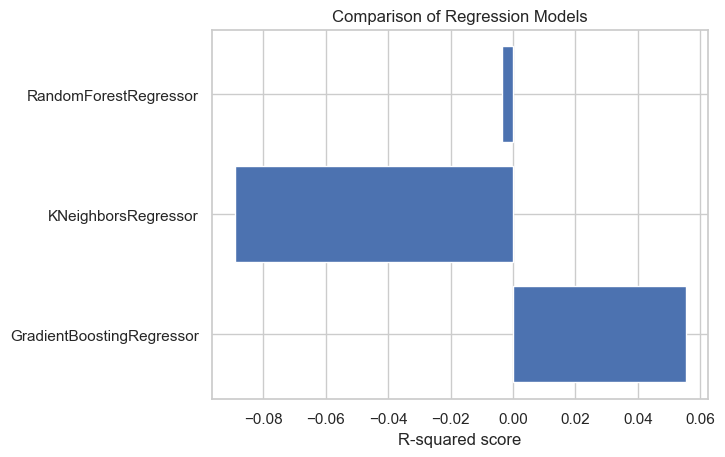

In [441]:
#Plot R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()))
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False)
ax.set_title('Comparison of Regression Models')

In [416]:
# GradientBoostingRegressor will be the model used based on r squared score
#Get exact r squared
reg_model = GradientBoostingRegressor()
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined))

R2 score is: 0.039626


In [417]:
#Try to fine tune regression model

# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    stroke,
                                                    test_size = .20,
                                                    random_state = 5)

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [100, 150, 200, 300],
                     'max_depth' : [3, 4, 5],
                     'loss': ['squared_error', 'absolute_error', 'huber']}]

# create and fit regression model
reg_model = GradientBoostingRegressor()
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

-0.03353105865038082
GradientBoostingRegressor()


In [418]:
#Get exact r squared from optimized model and compare to original
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized))
print('Model refinement improved R2 score by {:.4f}'.format(r2_optimized-r2_not_refined))

Optimized R2 score is: 0.036852
Model refinement improved R2 score by -0.0028


In [421]:
#Fitting the original model

# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    stroke,
                                                    test_size = .20,
                                                    random_state = 55)
#No parameters defined this time
no_parameters = [{}]

reg_model = GradientBoostingRegressor()
grid = GridSearchCV(reg_model,no_parameters)
grid.fit(X_train, y_train)
reg_model_fit = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

0.028022821555469802
GradientBoostingRegressor()


In [422]:
#Get exact r squared from fitted original model
y_test_preds = reg_model_fit.predict(X_test)
r2_fit = r2_score(y_test, y_test_preds)
print("Fitted R2 score is: {:2f}".format(r2_fit))

Fitted R2 score is: 0.054676


In [424]:
#Get importance of all features
feature_imp = pd.DataFrame(reg_model_fit.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)  

,importance
avg_glucose_level,0.374764
age,0.319585
bmi,0.143388
hypertension,0.042565
heart_disease,0.035251
EverMarried_No,0.025314
SmokingStatus_never smoked,0.016526
SmokingStatus_Unknown,0.010906
WorkType_Govt_job,0.008388
EverMarried_Yes,0.004598


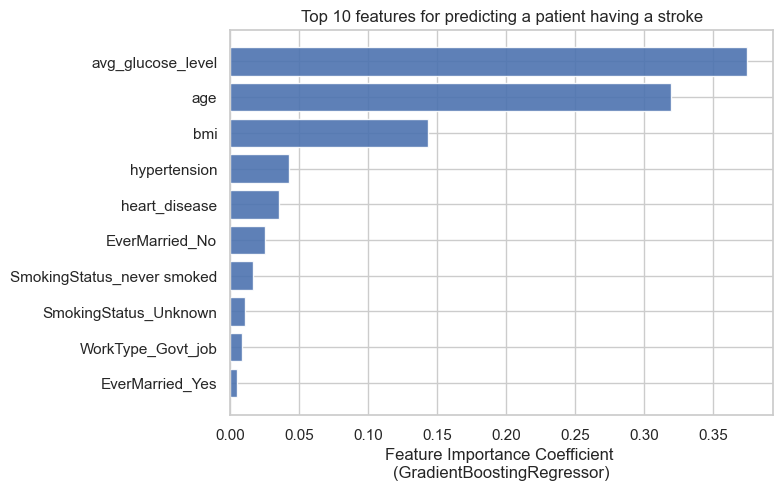

In [429]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,10)
ax.barh(ind, feature_imp['importance'].values[0:10]  ,
        align='center', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:10].tolist())
ax.tick_params(left=False, top=False, right=False)
ax.set_title("Top 10 features for predicting a patient having a stroke")
ax.set_xlabel('Feature Importance Coefficient \n(GradientBoostingRegressor)')
plt.gca().invert_yaxis()


Prediction Model Stroke 0.08794185949712353
Median Model Stroke 0.05289052890528905
Average Model Stroke 0.09869144985466015
Prediction Model RMS 0.007631923716604546
Median Model RMS 0.008065730042191882
Average Model RMS 0.00784975106834407


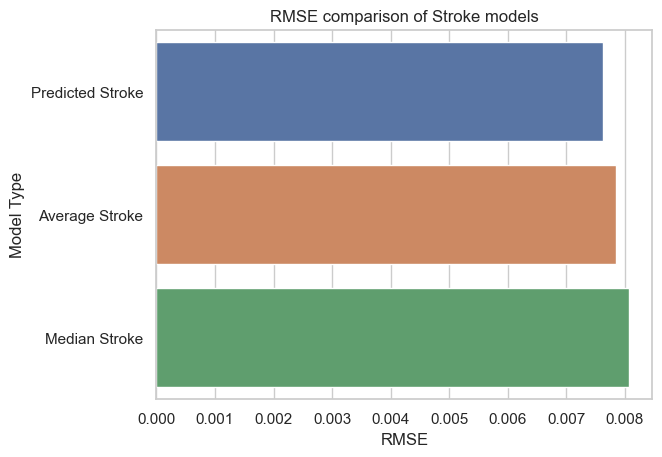

In [430]:
#Create variables for RMSE comparison
actual_avg = df_feat['stroke'].mean()
actual_median = df_feat['stroke'].median()
ml_count, md_count, avg_count = 0, 0, 0
ml_stroke, md_stroke, avg_stroke = 0, 0, 0
ml_stroke_rms, md_stroke_rms, avg_stroke_rms = 0, 0, 0

#RMSE comparison function
for i in range(y_test_preds.shape[0]):
    ml_model = abs(y_test_preds[i] - y_test[i])
    median_model = abs(actual_median - y_test[i])
    average_model = abs(actual_avg - y_test[i])

    ml_stroke += ml_model
    md_stroke += median_model
    avg_stroke += average_model

    ml_model_rms = (y_test_preds[i] - y_test[i]) ** 2
    median_model_rms = (actual_median - y_test[i]) ** 2
    average_model_rms = (actual_avg - y_test[i]) ** 2

    ml_stroke_rms += ml_model_rms
    md_stroke_rms += median_model_rms
    avg_stroke_rms += average_model_rms

#Print RMSE results
print("Prediction Model Stroke {}".format(ml_stroke / y_test_preds.shape[0]))
print("Median Model Stroke {}".format(md_stroke / y_test_preds.shape[0]))
print("Average Model Stroke {}".format(avg_stroke / y_test_preds.shape[0]))

print("Prediction Model RMS {}".format((ml_stroke_rms ** 0.5) / y_test_preds.shape[0]))
print("Median Model RMS {}".format((md_stroke_rms ** 0.5) / y_test_preds.shape[0]))
print("Average Model RMS {}".format((avg_stroke_rms ** 0.5) / y_test_preds.shape[0]))

# RMSE plot for writeup
data = pd.DataFrame({'RMSE': [(ml_stroke_rms**0.5)/y_test_preds.shape[0],
                             (avg_stroke_rms**0.5)/y_test_preds.shape[0],
                             (md_stroke_rms**0.5)/y_test_preds.shape[0]],
                     'Model Type': ['Predicted Stroke', 'Average Stroke', 'Median Stroke'] })

fig, ax = plt.subplots()
ax = sns.barplot(x='RMSE', y='Model Type', data=data)
ax.set_title('RMSE comparison of Stroke models')
ax.tick_params(top=False, left=False, right=False)

plt.show()

In [431]:
#Perform PCA on data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(df_feat) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


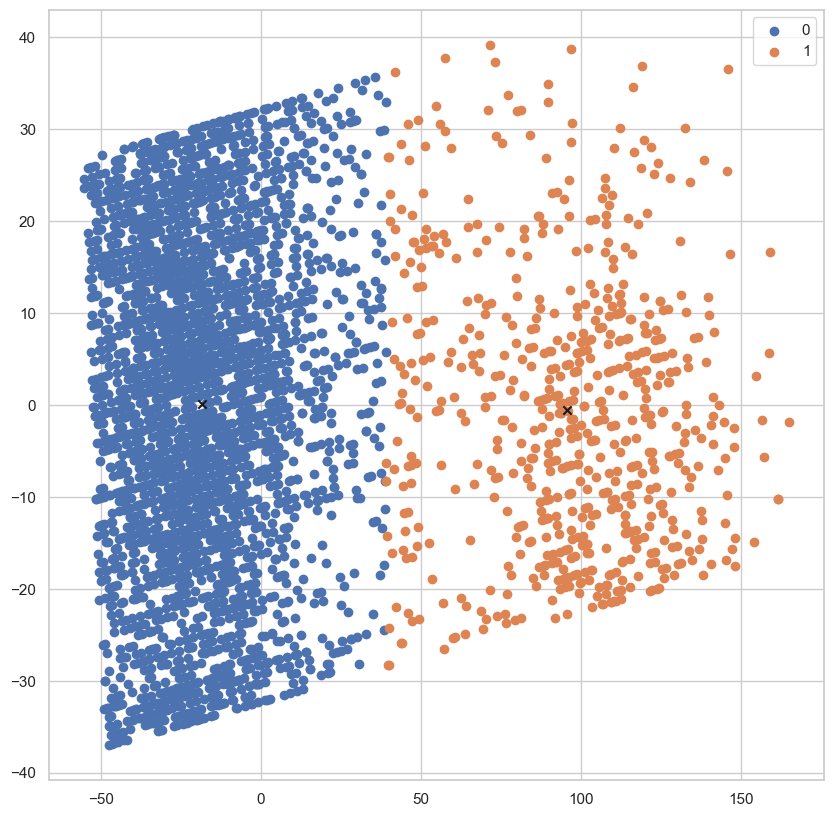

In [437]:
#Create K-means clustering plot
reg_model_fit = KMeans(n_clusters = 2, init = "k-means++")
label = reg_model_fit.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)

#Function to find centroid for each cluster, denoted by x
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

plt.legend()
plt.show()